In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
csv = 'clean_mail.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,body,sentiment
0,like to ensure you that we should need some po...,1
1,we have to have some political power practicin...,1
2,we have to make sure that the local political ...,1
3,we have to do the infected the management by i...,1
4,the local political power practicing leader sh...,1


In [2]:
my_df[my_df.isnull().any(axis=1)].head()

,body,sentiment
1884,NaN,0
3428,NaN,0
4210,NaN,0
4651,NaN,0
4952,NaN,0


In [3]:
neg_mail = my_df[my_df.sentiment == 1]
neg_string = []
for t in neg_mail.body:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

In [4]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 2 columns):
body         9634 non-null object
sentiment    9634 non-null int64
dtypes: int64(1), object(1)
memory usage: 150.6+ KB


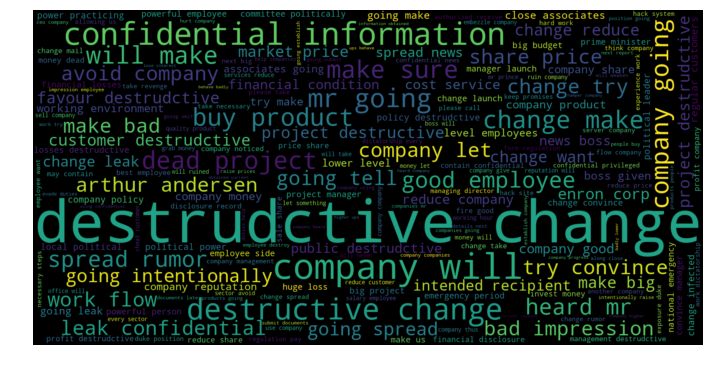

In [5]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
pos_tweets = my_df[my_df.sentiment == 0]
pos_string = []
for t in pos_tweets.body:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

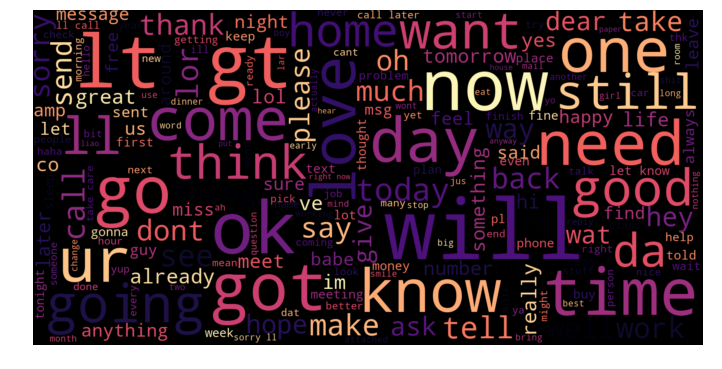

In [7]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()
x = my_df.body
y = my_df.sentiment

from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.01, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 2 columns):
body         9634 non-null object
sentiment    9634 non-null int64
dtypes: int64(1), object(1)
memory usage: 150.6+ KB


C:\Users\Iram Sagor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [10]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 2), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [11]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 56.25%
accuracy score: 100.00%
model is 43.75% more accurate than null accuracy
train and test time: 0.48s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 56.25%
accuracy score: 100.00%
model is 43.75% more accurate than null accuracy
train and test time: 0.45s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 56.25%
accuracy score: 100.00%
model is 43.75% more accurate than null accuracy
train and test time: 0.48s
-------------------------------------------------------

In [32]:
import pymysql
connection = pymysql.connect(host="localhost", user="root", passwd="", database="python_test1")
cursor = connection.cursor()
def inserting_verdict(num,From,To,body):
    insert1="INSERT INTO result_data(`mail_id`,`Ffrom`,`Tto`,`body`,`verdict`) VALUES('"+str(num)+"','"+str(From)+"','"+str(To)+"','"+str(body)+"','infected');"
    cursor.execute(insert1)
    connection.commit()
    #print(num,From,To,body)
def visit_check(num):
    updateSql = "UPDATE  email_data SET `Ccheck`= '1'  WHERE `mail_id` = '"+str(num)+"' ;"
    cursor.execute(updateSql  )
    connection.commit()
stop_word = ['now','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
lr = LogisticRegression()
tvec.set_params(stop_words=stop_word, max_features=80000, ngram_range=(1,2))
pipeline = Pipeline([
            ('vectorizer', tvec),
            ('classifier', lr)
        ])
sentiment_fit = pipeline.fit(x_train, y_train)
while 1:
    retrive="SELECT * FROM email_data;"
    cursor.execute(retrive)
    rows = cursor.fetchall()
    for row in rows:
        if row[4]==0:
            data_body=row[3]
            print(data_body)
            y_pred = sentiment_fit.predict([data_body])
            if y_pred[0]==1:
                print("its infected")
                inserting_verdict(int(row[0]),str(row[1]),str(row[2]),str(row[3]))
            else:
                print("its not infected")
        visit_check(row[0])       

KeyboardInterrupt: 